In [0]:
"""
Deep Image Prior
https://arxiv.org/abs/1711.10925

test inpainting part

"""
print()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive

/content/drive/My Drive


In [3]:
cd Deep\ Learning\ Project

/content/drive/My Drive/Deep Learning Project


In [4]:
cd Dataset\ Generation

/content/drive/My Drive/Deep Learning Project/Dataset Generation


In [5]:
cd Deep-Image-Prior_TF-practice/

/content/drive/My Drive/Deep Learning Project/Dataset Generation/Deep-Image-Prior_TF-practice


input_image.shape:  (512, 512, 3)


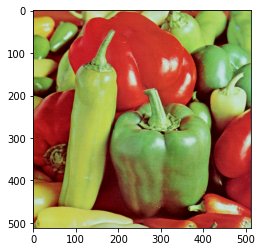

In [20]:
%matplotlib inline

import os, time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont

## load image
input_file = './pic_input/Peppers.png'
output_path = './pic_output/'

input_image = np.array(Image.open(input_file))[:, :, :3]
print('input_image.shape: ', input_image.shape)
plt.imshow(input_image)

In [0]:
cd Deep\ Learning\ Project

/content/drive/My Drive/Deep Learning Project


In [0]:
!ls

font  LICENSE  pic_input  pic_output  README.md  text_inpainting_test.ipynb


In [0]:
def get_binary_text_mask(for_image, sz=20, position=(128, 128), text='hello world'):

    font_fname = './font/FreeSansBold.ttf'
    font_size = sz
    font = ImageFont.truetype(font_fname, font_size)
    img_mask = Image.fromarray(np.array(for_image)*0+255)
    draw = ImageDraw.Draw(img_mask)
    draw.text(position, text, font=font, fill='rgb(0, 0, 0)')

    binary_mask_temp = np.array(img_mask)
    binary_mask = np.zeros_like(binary_mask_temp, dtype=np.float32)
    binary_mask += 1.0
    binary_mask[binary_mask_temp<254] -= 1.0

    return binary_mask

def image_save(path, img, reshape_size=[512, 512, 3]):
  
    img = np.array(img)
    img = img.reshape(reshape_size)
    img = np.clip(img, 0, 255).astype(np.uint8)
    Image.fromarray(img).save(path, quality=95)

def text_inpainting(input_image):

    image_shape = [shape for shape in input_image.shape[:-1]]
    output_image_shape = [1] + image_shape + [32]

    ## get mask
    binary_mask_1 = get_binary_text_mask(input_image, sz=30, position=(128, 128), 
                                         text='Image Corruption')
    binary_mask_2 = get_binary_text_mask(input_image, sz=25, position=(250, 300), 
                                         text='Text Over Image')
    binary_mask_3 = get_binary_text_mask(input_image, sz=25, position=(200, 400), 
                                         text='Deep Learning Project')
    binary_mask = np.multiply(np.multiply(binary_mask_1, binary_mask_2), binary_mask_3)

    corrupted_image = np.multiply(input_image, binary_mask)
    corrupted_image = corrupted_image.astype(np.uint8)

    ## show image
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(1,3,1)
    ax1.set_title('original_image')
    ax1.imshow(input_image)
    ax2 = fig.add_subplot(1,3,2)
    ax2.set_title('binary_mask')
    ax2.imshow(binary_mask)
    ax3 = fig.add_subplot(1,3,3)
    ax3.set_title('corrupted_image')
    ax3.imshow(corrupted_image)
    plt.show()
    fig.savefig(output_path+'all_image.png', bbox_inches='tight') 

    image_save(path='./pic_output/'+'binary_mask.png', img=binary_mask)
    image_save(path='./pic_output/'+'corrupted_image.png', img=corrupted_image)


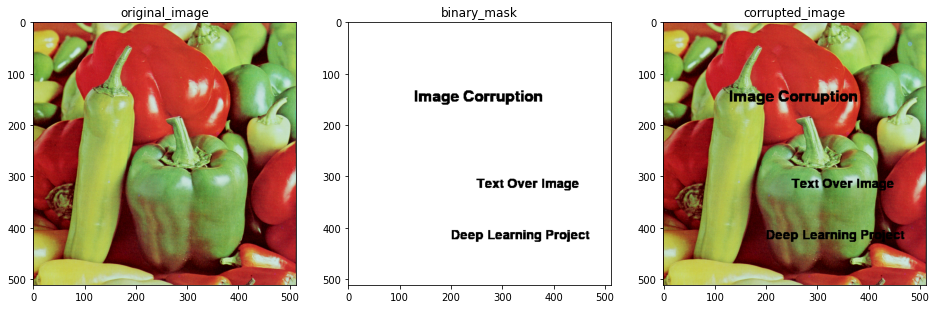

In [22]:
text_inpainting(input_image)